In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [283]:
# Import Dataset
df = pd.read_excel('D:\Modified_Dataset.xlsx')

# Print data shape
print ("Database_Shape:{}".format(df.shape))

df.tail(10)

Database_Shape:(189, 9)


,BP_Thickness,BP_Fy,Anchor_Dia,Anchor_Quantity,Embed_Length,Grout_Thickness,Pitch_Length,Column_Section,Failure_Mode
179,15.9,379,32.0,8,400,0,127.0,W,3
180,15.9,379,32.0,8,400,0,127.0,W,3
181,19.1,379,32.0,8,400,0,127.0,W,3
182,12.7,379,19.0,4,400,0,101.0,W,1
183,9.0,270,12.0,8,205,0,230.0,HSS,2
184,9.0,270,12.0,8,205,0,230.0,HSS,2
185,9.0,270,12.0,8,205,0,230.0,HSS,2
186,19.0,250,12.0,8,205,0,230.0,HSS,2
187,19.0,250,12.0,8,205,0,230.0,HSS,1
188,19.0,250,12.0,8,205,0,230.0,HSS,1


### Description of Database

In [284]:
df.columns

Index(['BP_Thickness', 'BP_Fy', 'Anchor_Dia', 'Anchor_Quantity',
       'Embed_Length', 'Grout_Thickness', 'Pitch_Length', 'Column_Section',
       'Failure_Mode'],
      dtype='object')

In [285]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   BP_Thickness     189 non-null    float64
 1   BP_Fy            189 non-null    int64  
 2   Anchor_Dia       189 non-null    float64
 3   Anchor_Quantity  189 non-null    int64  
 4   Embed_Length     189 non-null    int64  
 5   Grout_Thickness  189 non-null    int64  
 6   Pitch_Length     187 non-null    float64
 7   Column_Section   189 non-null    object 
 8   Failure_Mode     189 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 13.4+ KB
None


### Exploratory Data Analysis

In [4]:
# Checking any missing values 

df.isnull().sum()

BP_Thickness       0
BP_Fy              0
Anchor_Dia         0
Anchor_Quantity    0
Embed_Length       0
Grout_Thickness    0
Pitch_Length       2
Column_Section     0
Failure_Mode       0
dtype: int64

### Pitch Length have few missing values

In [5]:
# Dropping the Pitch_Length column from the database due to missing values

df.drop('Pitch_Length', axis= 1, inplace=True)
df.tail()

,BP_Thickness,BP_Fy,Anchor_Dia,Anchor_Quantity,Embed_Length,Grout_Thickness,Column_Section,Failure_Mode
184,9.0,270,12.0,8,205,0,HSS,2
185,9.0,270,12.0,8,205,0,HSS,2
186,19.0,250,12.0,8,205,0,HSS,2
187,19.0,250,12.0,8,205,0,HSS,1
188,19.0,250,12.0,8,205,0,HSS,1


In [6]:
# Description of string values in the Column Section

print (df['Column_Section'].unique())
print(df.groupby('Column_Section').size())

['W' 'HSS']
Column_Section
HSS     74
W      115
dtype: int64


In [7]:
# Encoding string values for Column Section

from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
df.loc[:,['Column_Section']] = df.loc[:,['Column_Section']].apply(enc.fit_transform)
df.tail(10)

,BP_Thickness,BP_Fy,Anchor_Dia,Anchor_Quantity,Embed_Length,Grout_Thickness,Column_Section,Failure_Mode
179,15.9,379,32.0,8,400,0,1,3
180,15.9,379,32.0,8,400,0,1,3
181,19.1,379,32.0,8,400,0,1,3
182,12.7,379,19.0,4,400,0,1,1
183,9.0,270,12.0,8,205,0,0,2
184,9.0,270,12.0,8,205,0,0,2
185,9.0,270,12.0,8,205,0,0,2
186,19.0,250,12.0,8,205,0,0,2
187,19.0,250,12.0,8,205,0,0,1
188,19.0,250,12.0,8,205,0,0,1


Text(0, 0.5, 'Failure Mode')

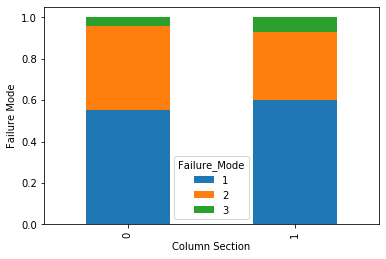

In [8]:
table=pd.crosstab(df.Column_Section,df.Failure_Mode)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Column Section')
plt.ylabel('Failure Mode')

Column Section seems to have no significant influence on Failure Mode

In [9]:
# Dropping the Column_Section from the database column 

df.drop('Column_Section', axis= 1, inplace=True)
df.tail()

,BP_Thickness,BP_Fy,Anchor_Dia,Anchor_Quantity,Embed_Length,Grout_Thickness,Failure_Mode
184,9.0,270,12.0,8,205,0,2
185,9.0,270,12.0,8,205,0,2
186,19.0,250,12.0,8,205,0,2
187,19.0,250,12.0,8,205,0,1
188,19.0,250,12.0,8,205,0,1


In [10]:
print  ("Analysis_Database_Shape:{}".format(df.shape))

Analysis_Database_Shape:(189, 7)


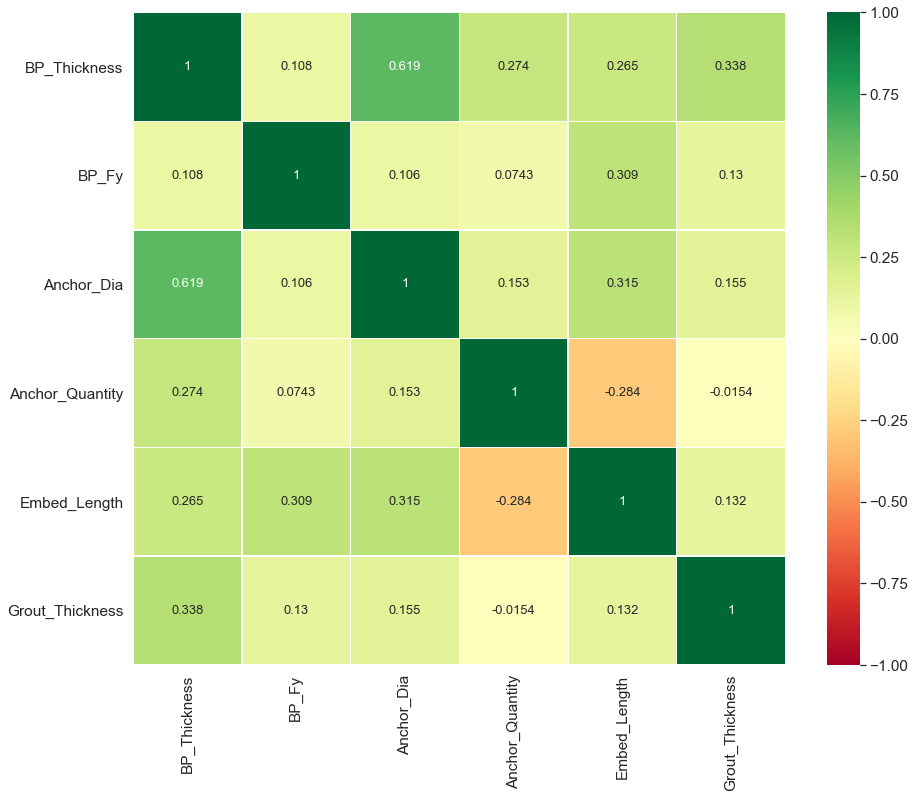

In [11]:
# Examining correlations

import seaborn as sns
corr = df.drop('Failure_Mode', axis=1).corr() 
plt.figure(figsize=(15, 12))

sns.set(font_scale=1.4) 
sns.heatmap(corr[(corr >= 0.0) | (corr <= -0.0)], 
            cmap='RdYlGn', vmax=1.0, vmin=-1.0, linewidths=0.2, cbar=True, fmt='.3g',
            annot=True, annot_kws={"size": 13}, square=True);

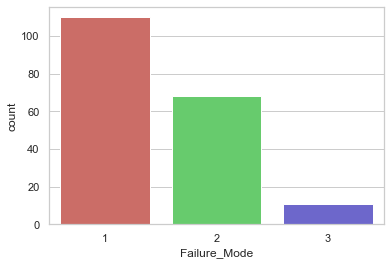

Failure_Mode
1    110
2     68
3     11
dtype: int64

In [286]:
# Check whether data is imbalanced

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x='Failure_Mode',data=df, palette='hls')
plt.show()
df.groupby('Failure_Mode').size()

Dataset is highly imbalanced with respect to the Failure Mode

### Data Preprocessing

In [270]:
# Define X & y

X = df.iloc[:, :6]
y = df.Failure_Mode
X.tail()

,BP_Thickness,BP_Fy,Anchor_Dia,Anchor_Quantity,Embed_Length,Grout_Thickness
184,9.0,270,12.0,8,205,0
185,9.0,270,12.0,8,205,0
186,19.0,250,12.0,8,205,0
187,19.0,250,12.0,8,205,0
188,19.0,250,12.0,8,205,0


In [15]:
y.tail()

184    2
185    2
186    2
187    1
188    1
Name: Failure_Mode, dtype: int64

In [16]:
# Train and Test dataset (Split 70/30)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [17]:
# Applying SMOTE to train data

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2, k_neighbors=5)
X_res, y_res = sm.fit_sample(X_train.astype('float'), y_train)

Using TensorFlow backend.


In [18]:
from collections import Counter
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_res))

Before SMOTE : Counter({1: 80, 2: 44, 3: 8})
After SMOTE : Counter({3: 80, 1: 80, 2: 80})


In [19]:
X_train=X_res.copy()
y_train=y_res.copy()

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
print ("X_Train_Shape:{}".format(X_train.shape))
print ("y_Train_Shape:{}".format(y_train.shape))
print ("X_Test_Shape:{}".format(X_test.shape))
print ("y_Test_Shape:{}".format(y_test.shape))

X_Train_Shape:(240, 6)
y_Train_Shape:(240,)
X_Test_Shape:(57, 6)
y_Test_Shape:(57,)


### Application of Machine Learning Algorithms

### Support Vector Machine

In [282]:
from sklearn.svm import SVC
svc = SVC(random_state=0)
svc.fit(X_train, y_train)

print('Accuracy of SVC on training set: {:.2f}'
     .format(svc.score(X_train, y_train)))
print('Accuracy of SVC on test set: {:.2f}'
     .format(svc.score(X_test, y_test)))

Accuracy of SVC on training set: 0.86
Accuracy of SVC on test set: 0.63


In [156]:
# Results (Training Set)

y_pred_train = svc.predict(X_train)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, y_pred_train)
print(confusion_matrix)

[[69  9  2]
 [ 3 63 14]
 [ 3  2 75]]


In [157]:
# Results (Training Set)

from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           1       0.92      0.86      0.89        80
           2       0.85      0.79      0.82        80
           3       0.82      0.94      0.88        80

    accuracy                           0.86       240
   macro avg       0.87      0.86      0.86       240
weighted avg       0.87      0.86      0.86       240



In [158]:
# Results (Test Set)

y_pred = svc.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[23  6  1]
 [ 5 12  7]
 [ 2  0  1]]


In [159]:
# Results (Test Set)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.77      0.77      0.77        30
           2       0.67      0.50      0.57        24
           3       0.11      0.33      0.17         3

    accuracy                           0.63        57
   macro avg       0.51      0.53      0.50        57
weighted avg       0.69      0.63      0.65        57



### Naive Bayes

In [161]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.62
Accuracy of GNB classifier on test set: 0.65


In [162]:
# Results (Training Set)

y_pred_train = gnb.predict(X_train)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, y_pred_train)
print(confusion_matrix)

[[52 14 14]
 [17 47 16]
 [16 15 49]]


In [163]:
# Results (Training Set)

from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           1       0.61      0.65      0.63        80
           2       0.62      0.59      0.60        80
           3       0.62      0.61      0.62        80

    accuracy                           0.62       240
   macro avg       0.62      0.62      0.62       240
weighted avg       0.62      0.62      0.62       240



In [164]:
# Results (Test Set)

y_pred = gnb.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[19  7  4]
 [ 3 17  4]
 [ 2  0  1]]


In [165]:
# Results (Test Set)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.79      0.63      0.70        30
           2       0.71      0.71      0.71        24
           3       0.11      0.33      0.17         3

    accuracy                           0.65        57
   macro avg       0.54      0.56      0.53        57
weighted avg       0.72      0.65      0.68        57



### K-Nearest Neighbor

In [167]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.89
Accuracy of K-NN classifier on test set: 0.74


In [168]:
# Results (Training Set)

y_pred_train = knn.predict(X_train)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, y_pred_train)
print(confusion_matrix)

[[75  3  2]
 [ 6 66  8]
 [ 2  6 72]]


In [169]:
# Results (Training Set)

from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           1       0.90      0.94      0.92        80
           2       0.88      0.82      0.85        80
           3       0.88      0.90      0.89        80

    accuracy                           0.89       240
   macro avg       0.89      0.89      0.89       240
weighted avg       0.89      0.89      0.89       240



In [170]:
# Results (Test Set)

y_pred = knn.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[28  1  1]
 [ 7 13  4]
 [ 2  0  1]]


In [171]:
# Results (Test Set)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.76      0.93      0.84        30
           2       0.93      0.54      0.68        24
           3       0.17      0.33      0.22         3

    accuracy                           0.74        57
   macro avg       0.62      0.60      0.58        57
weighted avg       0.80      0.74      0.74        57



### Random Forest

In [172]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
RF = RandomForestClassifier(random_state=0)
RF.fit(X_train, y_train)

print('Accuracy of RF classifier on training set: {:.2f}'
     .format(RF.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(RF.score(X_test, y_test)))

Accuracy of RF classifier on training set: 0.98
Accuracy of RF classifier on test set: 0.88


In [173]:
# Results (Training Set)

y_pred_train = RF.predict(X_train)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, y_pred_train)
print(confusion_matrix)

[[80  0  0]
 [ 1 79  0]
 [ 0  3 77]]


In [174]:
# Results (Training Set)

from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           1       0.99      1.00      0.99        80
           2       0.96      0.99      0.98        80
           3       1.00      0.96      0.98        80

    accuracy                           0.98       240
   macro avg       0.98      0.98      0.98       240
weighted avg       0.98      0.98      0.98       240



In [175]:
# Results (Test Set)

y_pred = RF.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[30  0  0]
 [ 5 19  0]
 [ 2  0  1]]


In [176]:
# Results (Test Set)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.81      1.00      0.90        30
           2       1.00      0.79      0.88        24
           3       1.00      0.33      0.50         3

    accuracy                           0.88        57
   macro avg       0.94      0.71      0.76        57
weighted avg       0.90      0.88      0.87        57



### Decision Tree

In [181]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.98
Accuracy of Decision Tree classifier on test set: 0.91


In [182]:
# Results (Training Set)

y_pred_train = clf.predict(X_train)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, y_pred_train)
print(confusion_matrix)

[[80  0  0]
 [ 1 79  0]
 [ 0  3 77]]


In [183]:
# Results (Training Set)

from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           1       0.99      1.00      0.99        80
           2       0.96      0.99      0.98        80
           3       1.00      0.96      0.98        80

    accuracy                           0.98       240
   macro avg       0.98      0.98      0.98       240
weighted avg       0.98      0.98      0.98       240



In [184]:
# Results (Test Set)

y_pred = clf.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[30  0  0]
 [ 2 21  1]
 [ 2  0  1]]


In [185]:
# Results (Test Set)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.88      1.00      0.94        30
           2       1.00      0.88      0.93        24
           3       0.50      0.33      0.40         3

    accuracy                           0.91        57
   macro avg       0.79      0.74      0.76        57
weighted avg       0.91      0.91      0.91        57



In [47]:
from mlxtend.evaluate import feature_importance_permutation

imp_vals, feature =feature_importance_permutation(predict_method=clf.predict,X=X_test,y=y_test,metric='accuracy',
    num_rounds=5,seed=2)
print(imp_vals)

[0.26315789 0.15438596 0.11929825 0.06315789 0.24210526 0.0245614 ]


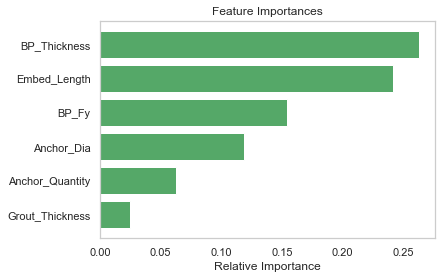

In [264]:
features = list(X.columns.values)

importances = imp_vals
import numpy as np
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.grid(b=None)
plt.show()

### Post pruning Decision Tree with Cost Complexity Pruning

In [273]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {} and a depth of: {}".format(
clfs[-1].tree_.node_count, ccp_alphas[-1],clfs[-1].tree_.max_depth))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.10934083099031566 and a depth of: 0


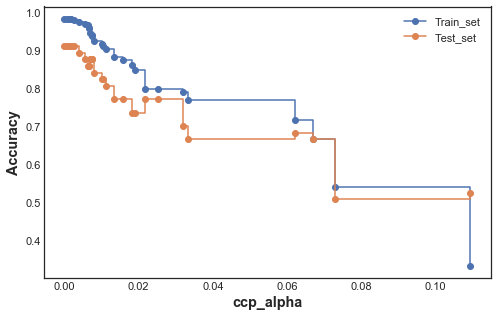

In [292]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

plt.style.use('seaborn-white')

#leg = plt.legend()
#leg.get_frame().set_edgecolor('Black')
#plt.grid(b=None)
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_xlabel("ccp_alpha", fontweight='bold', fontsize='large')
ax.set_ylabel("Accuracy", fontweight='bold', fontsize='large')
#ax.set_title("Accuracy vs ccp_alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="Train_set",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="Test_set",
        drawstyle="steps-post")
#ax.set_ylim([0.65, 1])
ax.legend()

plt.savefig('/Users/mkabir4/Desktop/DT_Prun.png', bbox_inches='tight', dpi=100, edgecolor='b')
plt.show()

### XGBoost

In [193]:
from xgboost import XGBClassifier
from sklearn.datasets import make_classification

XGB = XGBClassifier(random_state=0)
XGB.fit(X_train, y_train)
print('Accuracy of XGB classifier on training set: {:.2f}'
     .format(XGB.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
     .format(XGB.score(X_test, y_test)))

Accuracy of XGB classifier on training set: 0.98
Accuracy of XGB classifier on test set: 0.82


In [194]:
# Results (Training Set)

y_pred_train = XGB.predict(X_train)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, y_pred_train)
print(confusion_matrix)

[[80  0  0]
 [ 1 79  0]
 [ 0  3 77]]


In [195]:
# Results (Training Set)

from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           1       0.99      1.00      0.99        80
           2       0.96      0.99      0.98        80
           3       1.00      0.96      0.98        80

    accuracy                           0.98       240
   macro avg       0.98      0.98      0.98       240
weighted avg       0.98      0.98      0.98       240



In [196]:
# Results (Test Set)

y_pred = XGB.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[28  0  2]
 [ 5 18  1]
 [ 2  0  1]]


In [197]:
# Results (Test Set)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.80      0.93      0.86        30
           2       1.00      0.75      0.86        24
           3       0.25      0.33      0.29         3

    accuracy                           0.82        57
   macro avg       0.68      0.67      0.67        57
weighted avg       0.86      0.82      0.83        57



### Light GBM

In [198]:
from lightgbm import LGBMClassifier
from sklearn.datasets import make_classification

LGB = LGBMClassifier(random_state=0)
LGB.fit(X_train, y_train)
print('Accuracy of LGB classifier on training set: {:.2f}'
     .format(LGB.score(X_train, y_train)))
print('Accuracy of LGB classifier on test set: {:.2f}'
     .format(LGB.score(X_test, y_test)))

Accuracy of LGB classifier on training set: 0.96
Accuracy of LGB classifier on test set: 0.79


In [199]:
# Results (Training Set)

y_pred_train = LGB.predict(X_train)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, y_pred_train)
print(confusion_matrix)

[[79  1  0]
 [ 1 76  3]
 [ 0  4 76]]


In [200]:
# Results (Training Set)

from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99        80
           2       0.94      0.95      0.94        80
           3       0.96      0.95      0.96        80

    accuracy                           0.96       240
   macro avg       0.96      0.96      0.96       240
weighted avg       0.96      0.96      0.96       240



In [201]:
# Results (Test Set)

y_pred = LGB.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[28  0  2]
 [ 5 16  3]
 [ 2  0  1]]


In [202]:
# Results (Test Set)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.80      0.93      0.86        30
           2       1.00      0.67      0.80        24
           3       0.17      0.33      0.22         3

    accuracy                           0.79        57
   macro avg       0.66      0.64      0.63        57
weighted avg       0.85      0.79      0.80        57



### AdaBoost

In [203]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

ADB = AdaBoostClassifier(random_state=0)
ADB.fit(X_train, y_train)

print('Accuracy of ADB classifier on training set: {:.2f}'
     .format(ADB.score(X_train, y_train)))
print('Accuracy of ADB classifier on test set: {:.2f}'
     .format(ADB.score(X_test, y_test)))

Accuracy of ADB classifier on training set: 0.87
Accuracy of ADB classifier on test set: 0.75


In [204]:
# Results (Training Set)

y_pred_train = ADB.predict(X_train)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, y_pred_train)
print(confusion_matrix)

[[74  6  0]
 [ 9 64  7]
 [ 0  9 71]]


In [205]:
# Results (Training Set)

from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           1       0.89      0.93      0.91        80
           2       0.81      0.80      0.81        80
           3       0.91      0.89      0.90        80

    accuracy                           0.87       240
   macro avg       0.87      0.87      0.87       240
weighted avg       0.87      0.87      0.87       240



In [206]:
# Results (Test Set)

y_pred = ADB.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[27  2  1]
 [ 6 15  3]
 [ 2  0  1]]


In [207]:
# Results (Test Set)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.77      0.90      0.83        30
           2       0.88      0.62      0.73        24
           3       0.20      0.33      0.25         3

    accuracy                           0.75        57
   macro avg       0.62      0.62      0.60        57
weighted avg       0.79      0.75      0.76        57



### CatBoost

In [208]:
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification

CGB = CatBoostClassifier(random_state=0)
CGB.fit(X_train, y_train)
print('Accuracy of CGB classifier on training set: {:.2f}'
     .format(CGB.score(X_train, y_train)))
print('Accuracy of CGB classifier on test set: {:.2f}'
     .format(CGB.score(X_test, y_test)))

Learning rate set to 0.073572
0:	learn: 1.0559167	total: 2.28ms	remaining: 2.28s
1:	learn: 1.0103864	total: 3.73ms	remaining: 1.86s
2:	learn: 0.9639706	total: 4.7ms	remaining: 1.56s
3:	learn: 0.9268410	total: 5.72ms	remaining: 1.42s
4:	learn: 0.8872101	total: 6.69ms	remaining: 1.33s
5:	learn: 0.8585839	total: 7.67ms	remaining: 1.27s
6:	learn: 0.8292464	total: 8.74ms	remaining: 1.24s
7:	learn: 0.7983269	total: 9.79ms	remaining: 1.21s
8:	learn: 0.7769367	total: 10.9ms	remaining: 1.2s
9:	learn: 0.7567343	total: 12ms	remaining: 1.19s
10:	learn: 0.7368559	total: 13ms	remaining: 1.17s
11:	learn: 0.7139441	total: 14ms	remaining: 1.16s
12:	learn: 0.6907944	total: 15ms	remaining: 1.14s
13:	learn: 0.6738423	total: 16.1ms	remaining: 1.13s
14:	learn: 0.6560425	total: 17.1ms	remaining: 1.12s
15:	learn: 0.6373905	total: 18.2ms	remaining: 1.12s
16:	learn: 0.6227333	total: 19.1ms	remaining: 1.1s
17:	learn: 0.6140651	total: 19.6ms	remaining: 1.07s
18:	learn: 0.6017828	total: 20.7ms	remaining: 1.07s
19:

In [209]:
# Results (Training Set)

y_pred_train = CGB.predict(X_train)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, y_pred_train)
print(confusion_matrix)

[[80  0  0]
 [ 1 79  0]
 [ 0  3 77]]


In [210]:
# Results (Training Set)

from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           1       0.99      1.00      0.99        80
           2       0.96      0.99      0.98        80
           3       1.00      0.96      0.98        80

    accuracy                           0.98       240
   macro avg       0.98      0.98      0.98       240
weighted avg       0.98      0.98      0.98       240



In [211]:
# Results (Test Set)

y_pred = CGB.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[29  1  0]
 [ 5 18  1]
 [ 2  0  1]]


In [212]:
# Results (Test Set)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.81      0.97      0.88        30
           2       0.95      0.75      0.84        24
           3       0.50      0.33      0.40         3

    accuracy                           0.84        57
   macro avg       0.75      0.68      0.71        57
weighted avg       0.85      0.84      0.84        57

